<a href="https://colab.research.google.com/github/rrizwan98/Lungs-cancer-stage-segmentation-cancer-stage-classification/blob/main/Cancer_Stages_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [9]:
data=pd.read_csv('/content/drive/MyDrive/stages of lungs cancer dataset1.csv')
data.head()

,Unnamed: 0,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,label
0,0,1,69,0,1,1,0,0,0,1,1,1,1,1,1,0
1,1,1,74,1,0,0,0,1,1,0,0,0,1,1,1,0
2,2,0,59,0,0,0,1,0,0,1,0,1,1,0,1,1
3,3,1,63,1,1,1,0,0,0,0,1,0,0,1,1,1
4,4,0,63,0,1,0,0,0,0,1,0,1,1,0,0,1


In [10]:
# data.drop([ ''], axis=1, inplace=True)

# Column renameing

data.rename(columns = {'YELLOW_0INGERS':'YELLOW_FINGERS', '0ATIGUE':'FATIGUE','ALCOHOL CONSU1ING':'ALCOHOL CONSUMING', "SHORTNESS O0 BREATH":"SHORTNESS OF BREATH",
                       "SWALLOWING DI00ICULTY":"SWALLOWING DIFFICULTY","S1OKING":"SMOKING"}, inplace = True)
data.head()


,Unnamed: 0,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,label
0,0,1,69,0,1,1,0,0,0,1,1,1,1,1,1,0
1,1,1,74,1,0,0,0,1,1,0,0,0,1,1,1,0
2,2,0,59,0,0,0,1,0,0,1,0,1,1,0,1,1
3,3,1,63,1,1,1,0,0,0,0,1,0,0,1,1,1
4,4,0,63,0,1,0,0,0,0,1,0,1,1,0,0,1


In [11]:
# X1 = data[['GENDER',"AGE","CHEST PAIN","SWALLOWING DIFFICULTY","SHORTNESS OF BREATH","COUGHING","ALCOHOL CONSUMING","WHEEZING","YELLOW_FINGERS","SMOKING"]].values
# X1
data.drop(['Unnamed: 0','PEER_PRESSURE','CHRONIC DISEASE','ANXIETY'], axis=1, inplace=True)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,label
0,1,69,0,1,0,1,1,1,1,1,1,0
1,1,74,1,0,1,0,0,0,1,1,1,0
2,0,59,0,0,0,1,0,1,1,0,1,1
3,1,63,1,1,0,0,1,0,0,1,1,1
4,0,63,0,1,0,1,0,1,1,0,0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ALLERGY                309 non-null    int64
 5   WHEEZING               309 non-null    int64
 6   ALCOHOL CONSUMING      309 non-null    int64
 7   COUGHING               309 non-null    int64
 8   SHORTNESS OF BREATH    309 non-null    int64
 9   SWALLOWING DIFFICULTY  309 non-null    int64
 10  CHEST PAIN             309 non-null    int64
 11  label                  309 non-null    int64
dtypes: int64(12)
memory usage: 29.1 KB


In [13]:
data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,label
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.417476,0.563107,0.569579,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.757282
std,0.500221,8.407469,0.496806,0.495938,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.621049
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


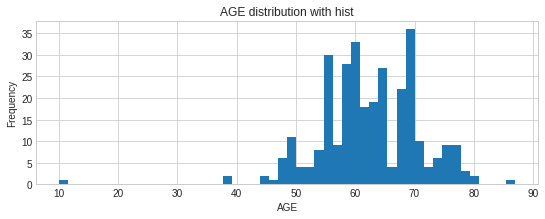

In [14]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

numericVar = ["AGE"]
for n in numericVar:
    plot_hist(n)

In [15]:
def bar_plot(variable):

    var = data[variable]
    varValue = var.value_counts()
    
    # görselleştirme
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

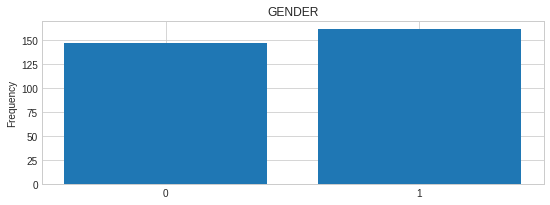

GENDER: 
 1    162
0    147
Name: GENDER, dtype: int64


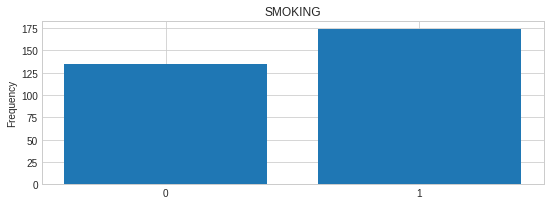

SMOKING: 
 1    174
0    135
Name: SMOKING, dtype: int64


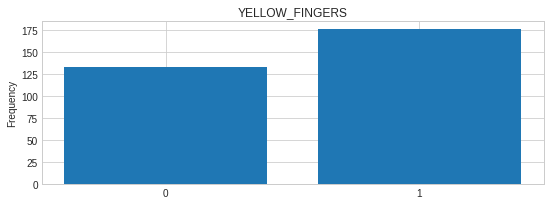

YELLOW_FINGERS: 
 1    176
0    133
Name: YELLOW_FINGERS, dtype: int64


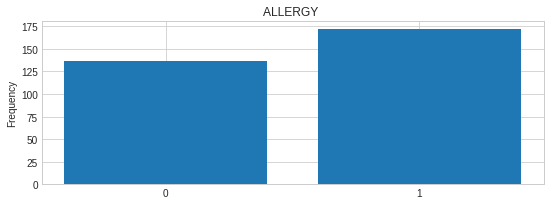

ALLERGY : 
 1    172
0    137
Name: ALLERGY , dtype: int64


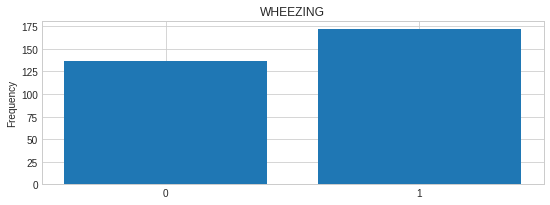

WHEEZING: 
 1    172
0    137
Name: WHEEZING, dtype: int64


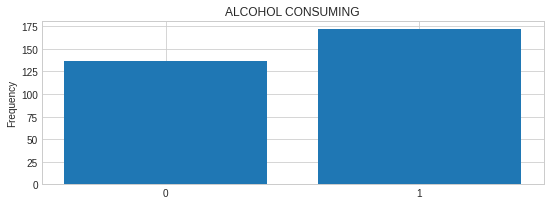

ALCOHOL CONSUMING: 
 1    172
0    137
Name: ALCOHOL CONSUMING, dtype: int64


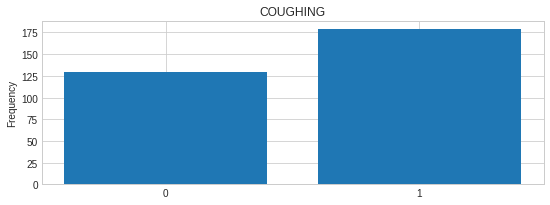

COUGHING: 
 1    179
0    130
Name: COUGHING, dtype: int64


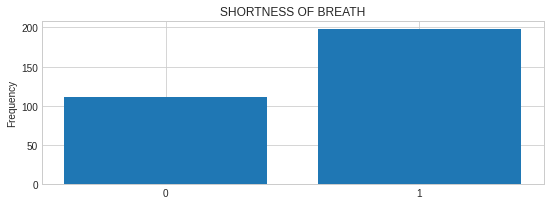

SHORTNESS OF BREATH: 
 1    198
0    111
Name: SHORTNESS OF BREATH, dtype: int64


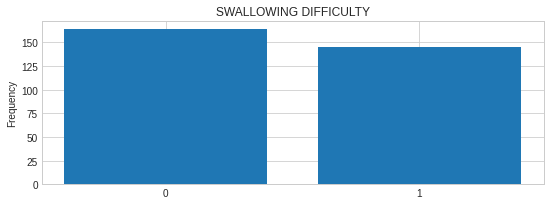

SWALLOWING DIFFICULTY: 
 0    164
1    145
Name: SWALLOWING DIFFICULTY, dtype: int64


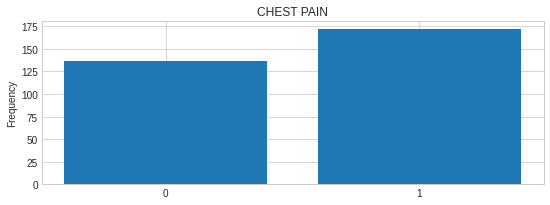

CHEST PAIN: 
 1    172
0    137
Name: CHEST PAIN, dtype: int64


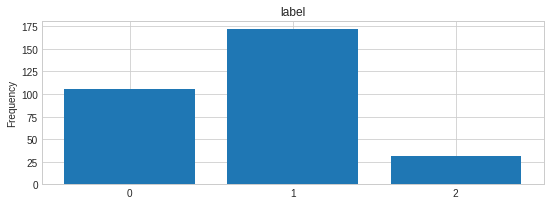

label: 
 1    172
0    106
2     31
Name: label, dtype: int64


In [16]:
category1 = ["GENDER","SMOKING","YELLOW_FINGERS", "ALLERGY ", "WHEEZING", "ALCOHOL CONSUMING",
             "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN", "label"]
for c in category1:
    bar_plot(c)

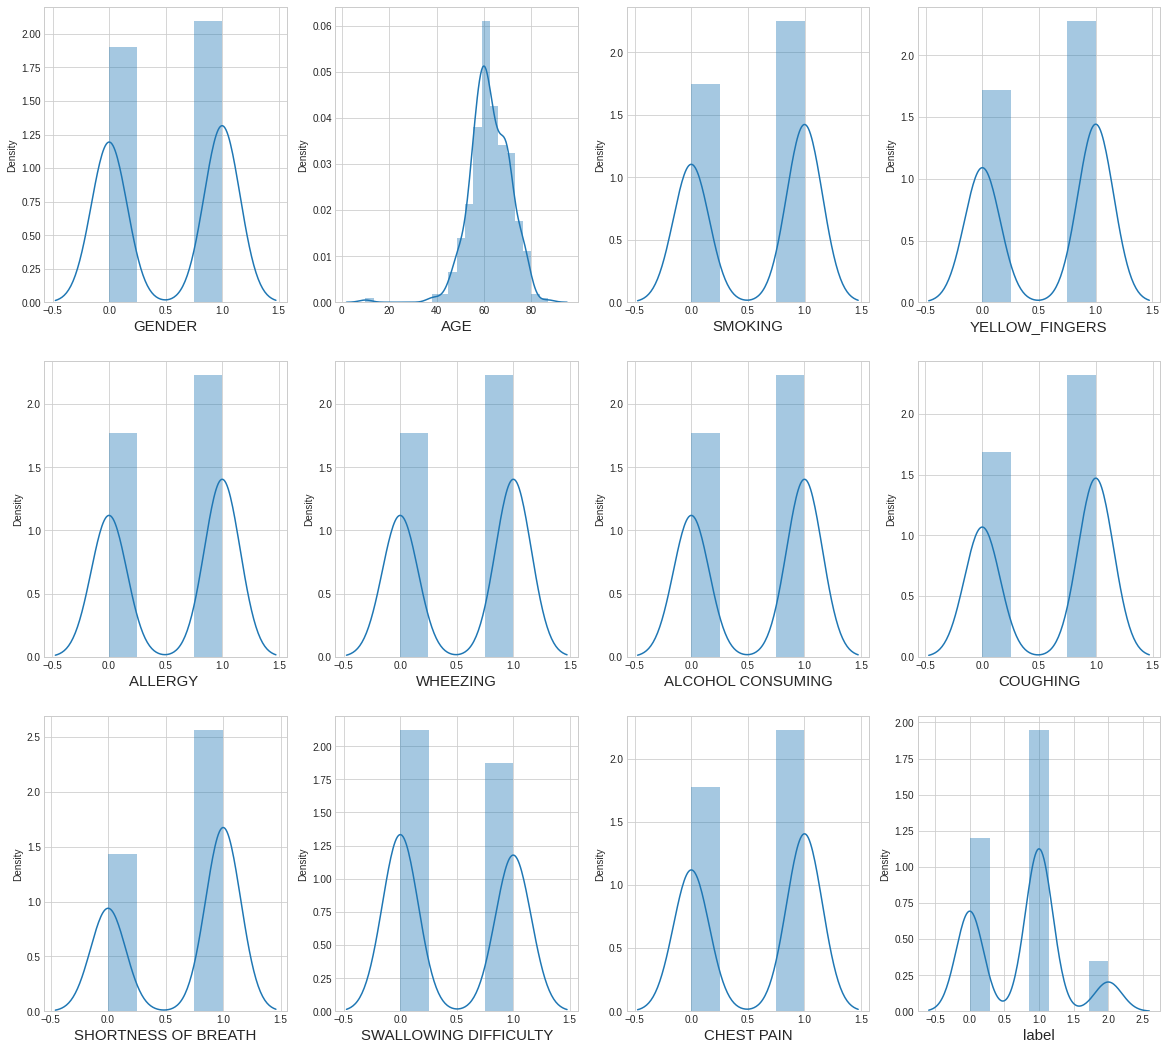

In [17]:
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

No handles with labels found to put in legend.


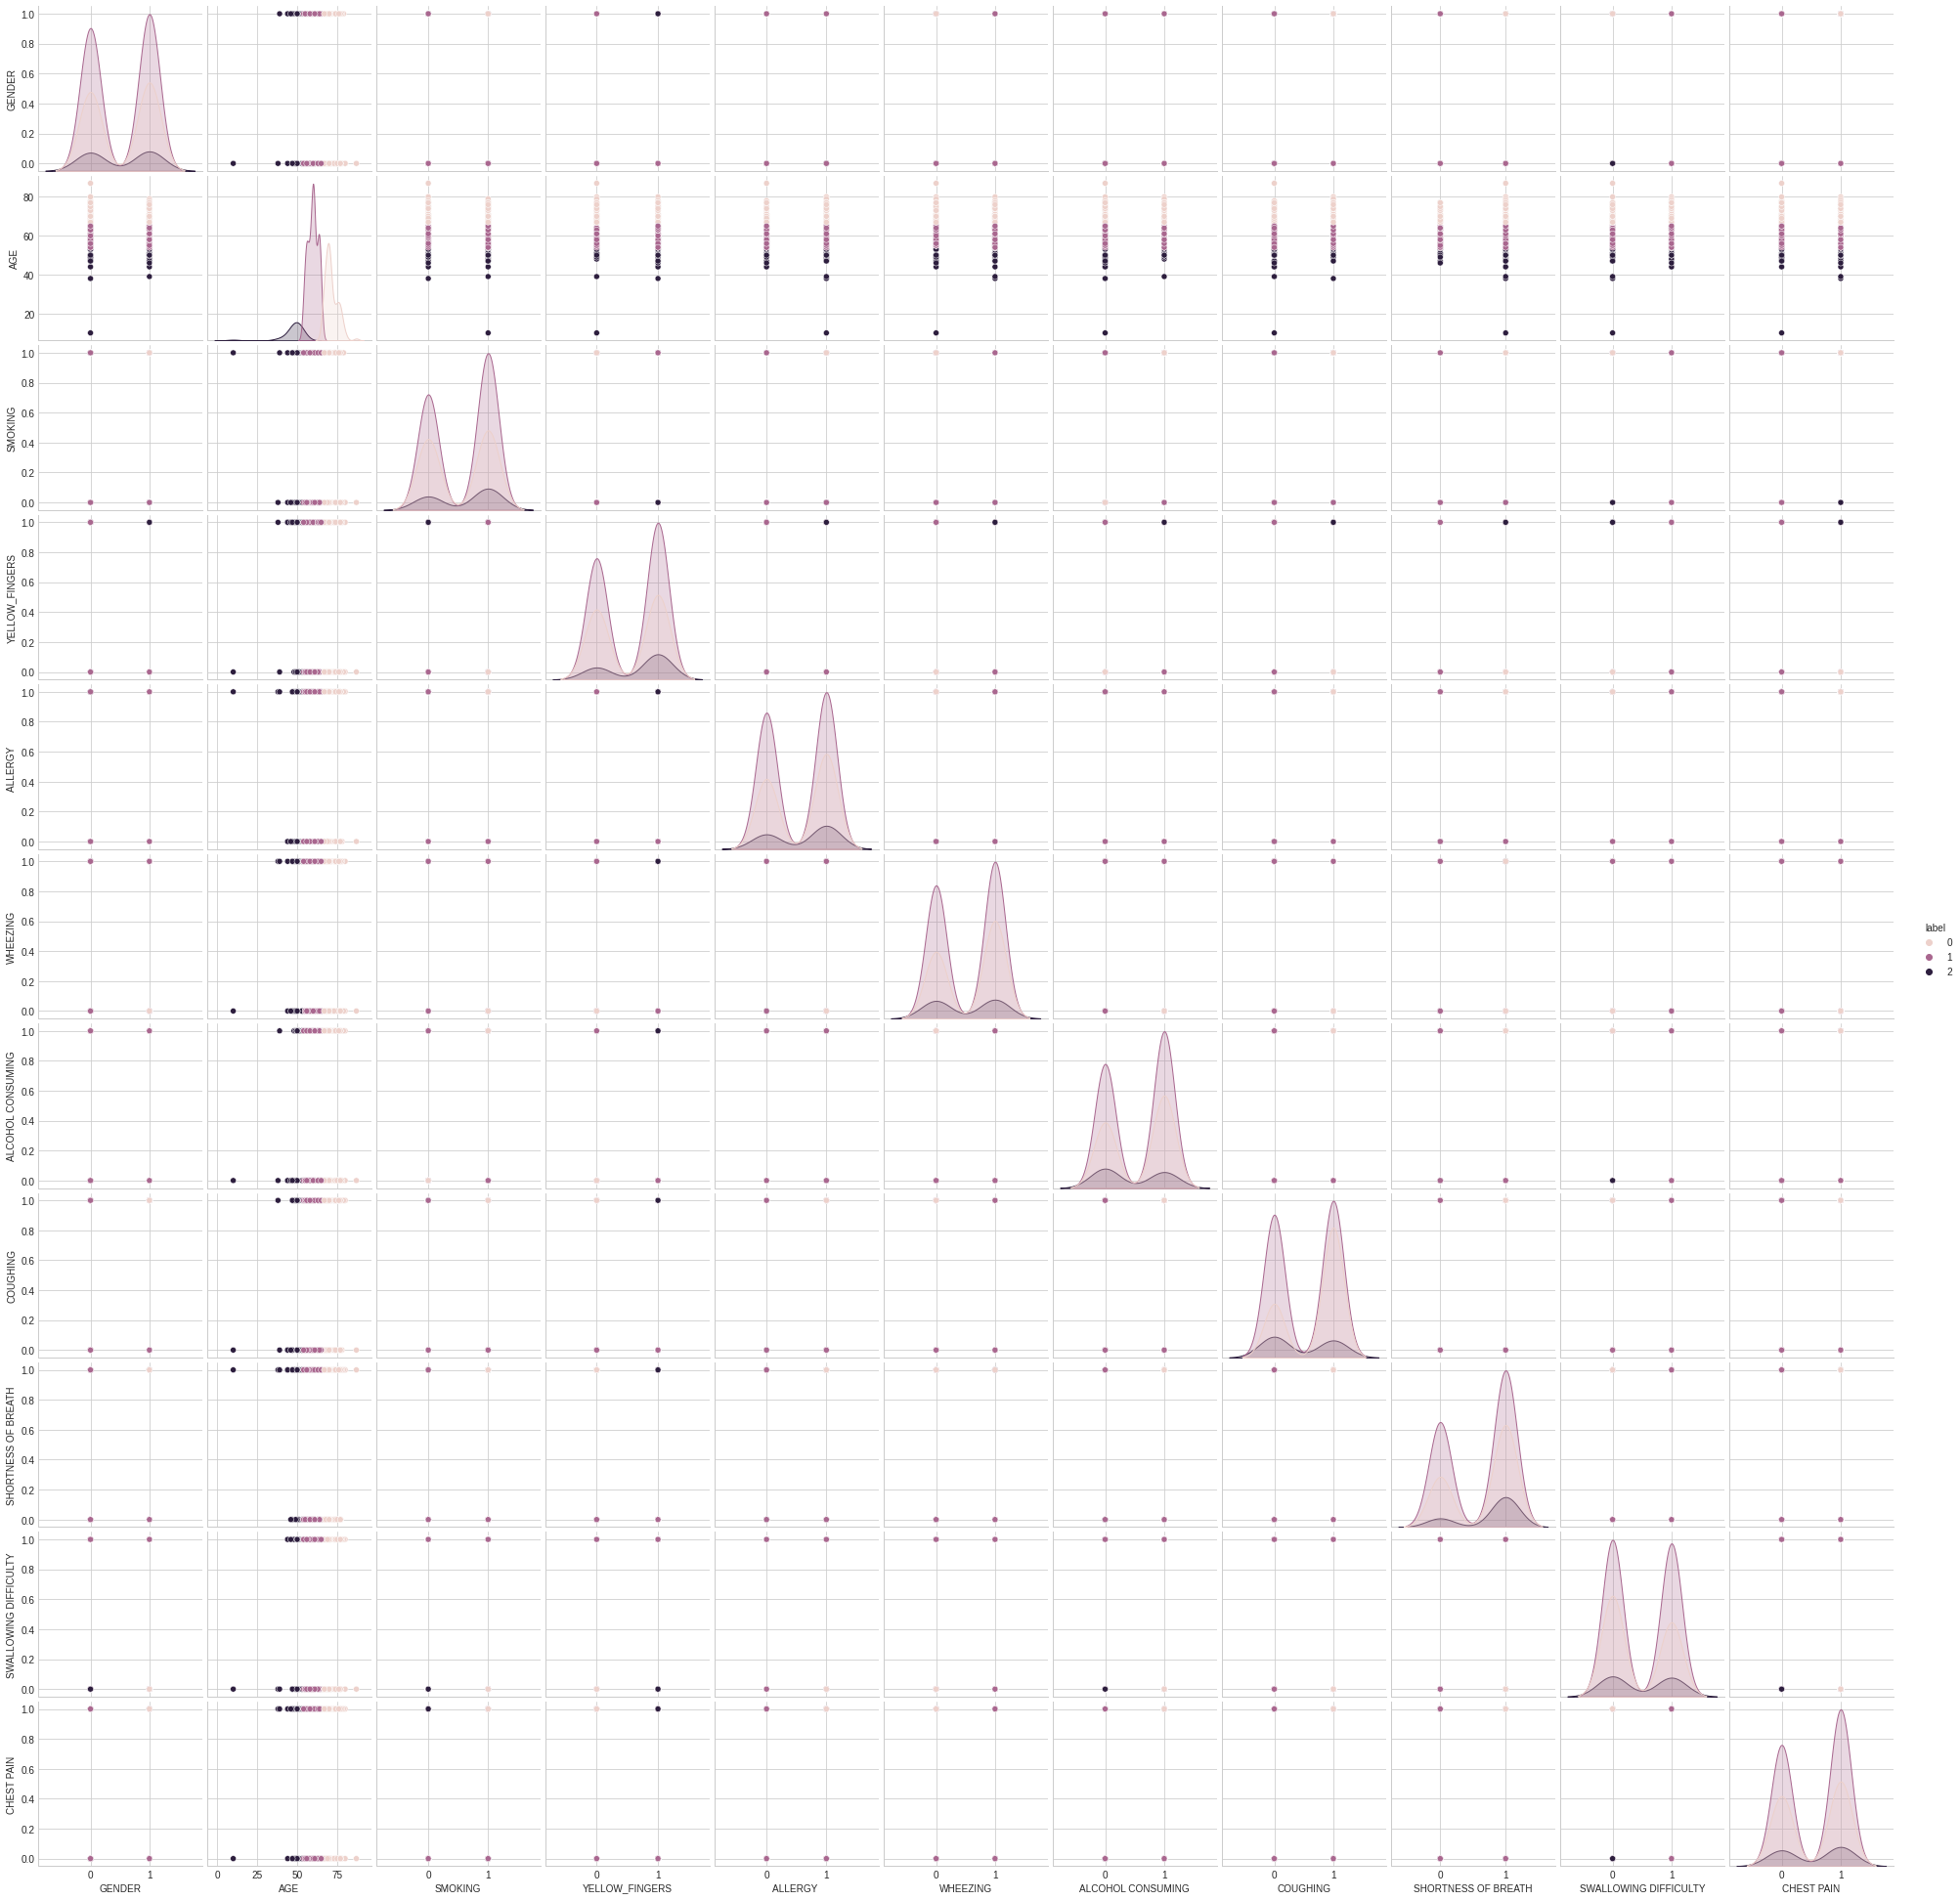

In [18]:
sns.pairplot(data,hue='label')
plt.legend()
plt.show()

In [18]:
data["label"].value_counts()

1    172
0    106
2     31
Name: label, dtype: int64

In [19]:
#boş/kayıp veri var mı,hangi feature larda var diye kontrol ediyorum, varsa ona göre dolduracağım 
print("Number of cells with null values: " , data.isnull().sum().sum())

Number of cells with null values:  0


In [20]:
print("Number of cells with null values: " , data.duplicated().sum())

Number of cells with null values:  41


In [21]:
data[["GENDER","label"]].groupby(["GENDER"], as_index = False).mean()

,GENDER,label
0,0,0.761905
1,1,0.753086


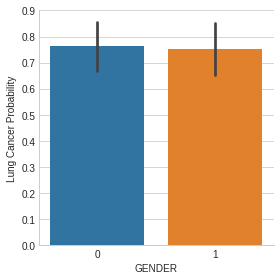

In [22]:
g = sns.factorplot(x = "GENDER", y = "label", data = data, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [23]:
data[["AGE","label"]].groupby(["AGE"], as_index = False).mean().sort_values(by="label",ascending = False )

,AGE,label
0,10,2
2,39,2
3,44,2
4,46,2
5,47,2
6,48,2
7,49,2
8,50,2
9,51,2
10,53,2


In [24]:
data[:24]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,label
0,1,69,0,1,0,1,1,1,1,1,1,0
1,1,74,1,0,1,0,0,0,1,1,1,0
2,0,59,0,0,0,1,0,1,1,0,1,1
3,1,63,1,1,0,0,1,0,0,1,1,1
4,0,63,0,1,0,1,0,1,1,0,0,1
5,0,75,0,1,1,1,0,1,1,0,0,0
6,1,51,1,0,0,1,1,1,1,0,1,2
7,0,50,1,1,1,0,0,0,1,1,0,2
8,0,68,1,0,0,0,0,0,0,0,0,0
9,1,53,1,1,1,0,1,0,0,1,1,2


In [36]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
# Models:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evolution:
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
X = data.drop(["label"], axis=1)
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 ) #test-train data split - 20/80
#X_train[0:10]  #eğitim setinin ilk 10 satırı
print("X_train : ",len(X_train))
print("X_test : ",len(X_test))
print("y_train : ",len(y_train))
print("y_test : ",len(y_test))

X_train :  247
X_test :  62
y_train :  247
y_test :  62


In [38]:
print(X_train.shape)
print(X_test.shape)
print(X_train.values)

(247, 11)
(62, 11)
[[ 1 50  1 ...  1  0  1]
 [ 1 53  0 ...  1  0  1]
 [ 1 67  0 ...  1  0  0]
 ...
 [ 0 60  1 ...  1  1  0]
 [ 0 70  1 ...  1  0  0]
 [ 1 64  1 ...  1  0  1]]


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from warnings import filterwarnings
filterwarnings('ignore')

In [43]:
models = [("LR", LogisticRegression(max_iter=1000)),
          ("SVC", SVC()),
          ("KNC", KNeighborsClassifier(n_neighbors=10)),
          ("DTC", DecisionTreeClassifier()),
          ("GNB", GaussianNB()),
         ("SGDC", SGDClassifier()),
         ("Perc", Perceptron()),
          ("NC", NearestCentroid()),
          ("Ridge", RidgeClassifier()),
          ("BNB", BernoulliNB()),
          ("RF", RandomForestClassifier()),
          ("ADA", AdaBoostClassifier()),
          ("XGB", GradientBoostingClassifier()),
          ("PAC", PassiveAggressiveClassifier()) 
    
]

results = []
names=[]
finalresults=[]

for name, model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score= precision_score(y_test, model_results, average='macro')
    results.append(score)
    names.append(name)
    finalresults.append((name,score))
finalresults.sort(key=lambda k:k[1], reverse=True)
finalresults

[('DTC', 1.0),
 ('ADA', 1.0),
 ('XGB', 1.0),
 ('LR', 0.978494623655914),
 ('GNB', 0.978494623655914),
 ('RF', 0.96875),
 ('SVC', 0.9509803921568628),
 ('SGDC', 0.942857142857143),
 ('PAC', 0.9331797235023042),
 ('Perc', 0.9129032258064517),
 ('NC', 0.8539288668320927),
 ('Ridge', 0.5945945945945946),
 ('KNC', 0.5388888888888889),
 ('BNB', 0.4873949579831933)]

In [44]:
# Grid search and space:
models_params= {
    "RF":{'model':RandomForestClassifier(),
         'params':{
             'max_features': list(range(1,10)),
             'n_estimators':[10,100,1000]
         }}}

# Evaluation:

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=20)

# Search:
scores=[]

for model_name, params in models_params.items(): 
    rs = RandomizedSearchCV(params['model'], params['params'], cv=cv , n_iter=10)
    rs.fit(X_train,y_train)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

,Model,Parameters,Score
0,RF,"{'n_estimators': 100, 'max_features': 9}",0.998576


In [48]:
# yhat = RF.predict(X_test)
# # connect predictions with outputs
# for i in range(10):
# 	print(X[i], yhat[i])

In [46]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42,max_features= 9)

In [47]:
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=9, random_state=42)

In [50]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.0 degrees.


In [55]:
expected=y_test
print(predictions)
print(expected)

[1 2 0 0 1 0 2 0 1 1 1 0 1 1 1 1 0 0 0 2 1 0 0 0 0 0 1 0 1 1 2 1 1 1 1 0 0
 1 1 1 0 0 0 0 2 1 0 2 1 1 0 0 1 1 0 0 1 0 0 1 1 1]
288    1
9      2
57     0
60     0
25     1
      ..
198    0
195    0
210    1
224    1
158    1
Name: label, Length: 62, dtype: int64
